<a href="https://colab.research.google.com/github/Wilfried-Tcheumaha/FeedAppBackEnd/blob/main/Wilfried_Tcheumaha_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Noisy data set - Implementation of preprocessing techniques

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Importing the main librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import math
import nltk
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from scipy.stats import shapiro
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_selection import r_regression, SelectKBest,chi2,mutual_info_regression
from sklearn.ensemble import RandomForestClassifier






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# importing data
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/noisy_data.csv",delimiter=",")
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [4]:
# Finding the dataset shape
data.shape

(10, 4)

In [5]:
# Exploring the features type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [6]:
# Checking missing values
data.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [7]:
data['Income'].mean()

76533.33333333333

In [8]:
# Mean imputation

# To replace the missing value we create below object of SimpleImputer class
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
''' Using the fit method, we apply the `imputa` object on the matrix of our feature x.
The `fit()` method identifies the missing values and computes the mean of such feature a missing value is present.
'''
imputa.fit(data[['Income']])
# Repalcing the missing value using transform method
data['Income'] = imputa.transform(data[['Income']])

data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.000000,No
1,Brazil,32.0,57600.000000,Yes
2,USA,35.0,64800.000000,No
3,Brazil,43.0,73200.000000,No
4,USA,45.0,76533.333333,Yes


In [9]:
# Applying Normality tests to numerical columns
numerical_columns = data.select_dtypes(include='number').columns

for column in numerical_columns:
    # Performing Shapiro-Wilk normality test
    stat, p = shapiro(data[column])

    # Stating the hypothesis and comment on the normality
    # H0: The sample was drawn from a Gaussian distribution
    alpha = 0.05
    if p > alpha:
        print(f"{column}: Data is normally distributed (fail to reject null hypothesis)")
    else:
        print(f"{column}: Data is not normally distributed (reject null hypothesis)")


Age: Data is normally distributed (fail to reject null hypothesis)
Income: Data is normally distributed (fail to reject null hypothesis)


In [10]:
# Applying encoding on 'Region' categorical variable
ct =ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),[0])], remainder ="passthrough")
data_preprocessed= ct.fit_transform(data)

# Get the column names of the preprocessed data
column_names = ct.get_feature_names_out(input_features=data.columns)



In [11]:
# columns name after oneHotEncoding
column_names



array(['OneHotEncoder__Region_Brazil', 'OneHotEncoder__Region_India',
       'OneHotEncoder__Region_USA', 'remainder__Age', 'remainder__Income',
       'remainder__Online Shopper'], dtype=object)

In [12]:
# Reassigning columns names

columns_dict = {

    "OneHotEncoder__Region_Brazil": "Brazil",
    "OneHotEncoder__Region_India" : "India",
    "OneHotEncoder__Region_USA" : "USA",
    "remainder__Age" : "Age",
    "remainder__Income" : "Income",
    "remainder__Online Shopper": "Online Shopper"
}

columns = [columns_dict.get(name, name) for name in column_names]

In [13]:
# Data preprocessed updated
data_preprocessed = pd.DataFrame(data_preprocessed, columns=columns)
data_preprocessed.head()

,Brazil,India,USA,Age,Income,Online Shopper
0,0.0,1.0,0.0,49.0,86400.0,No
1,1.0,0.0,0.0,32.0,57600.0,Yes
2,0.0,0.0,1.0,35.0,64800.0,No
3,1.0,0.0,0.0,43.0,73200.0,No
4,0.0,0.0,1.0,45.0,76533.333333,Yes


In [14]:
# Applying encoding on "Online Shopper" categorical variable

labelEncoder= LabelEncoder()
data_preprocessed['Online Shopper']=labelEncoder.fit_transform(data['Online Shopper'])
data_preprocessed



,Brazil,India,USA,Age,Income,Online Shopper
0,0.0,1.0,0.0,49.0,86400.0,0
1,1.0,0.0,0.0,32.0,57600.0,1
2,0.0,0.0,1.0,35.0,64800.0,0
3,1.0,0.0,0.0,43.0,73200.0,0
4,0.0,0.0,1.0,45.0,76533.333333,1
5,0.0,1.0,0.0,40.0,69600.0,1
6,1.0,0.0,0.0,NaN,62400.0,0
7,0.0,1.0,0.0,53.0,94800.0,1
8,0.0,0.0,1.0,55.0,99600.0,0
9,0.0,1.0,0.0,42.0,80400.0,1


In [15]:
# Scaling the " Age" and "Income" features
scaler = StandardScaler()
data_preprocessed[['Age','Income']] = scaler.fit_transform(data_preprocessed[['Age','Income']])
data_preprocessed


,Brazil,India,USA,Age,Income,Online Shopper
0,0.0,1.0,0.0,0.719931,0.749473,0
1,1.0,0.0,0.0,-1.623675,-1.438178,1
2,0.0,0.0,1.0,-1.210098,-0.891265,0
3,1.0,0.0,0.0,-0.107224,-0.253200,0
4,0.0,0.0,1.0,0.168495,0.000000,1
5,0.0,1.0,0.0,-0.520801,-0.526657,1
6,1.0,0.0,0.0,NaN,-1.073570,0
7,0.0,1.0,0.0,1.271368,1.387538,1
8,0.0,0.0,1.0,1.547087,1.752147,0
9,0.0,1.0,0.0,-0.245083,0.293712,1


## Handling Text data

In [16]:
# Importing the data
text = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/text.txt", header = None, delimiter="\t")
text

,0
0,The history of NLP generally started in the 19...
1,The Georgetown experiment in 1954 involved ful...
2,Some notably successful NLP systems developed ...


In [17]:
# Renaming the column and inspecting the first row

text.rename(columns={0:"Paragraph"}, inplace = True)
text['Paragraph'][0]

'The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.'

In [18]:
# Getting a list of stopwords from the NLTK library
stop = set(stopwords.words('english'))

# These words are important for your problem. You don't want to remove them.
excluding = ['against', 'not', 'don', 'don\'t','ain', 'are', 'aren\'t', 'could', 'couldn\'t',
             'did', 'didn\'t', 'does', 'doesn\'t', 'had', 'hadn\'t', 'has', 'hasn\'t',
             'have', 'haven\'t', 'is', 'isn\'t', 'might', 'mightn\'t', 'must', 'mustn\'t',
             'need', 'needn\'t','should', 'shouldn\'t', 'was', 'wasn\'t', 'were',
             'weren\'t', 'won\'t', 'would', 'wouldn\'t']

# New stopword list
stopwords = [word for word in stop if word not in excluding]

In [19]:
# Tokenization using RegexpTokenizer
def regexp_tokenizer (text):
  tokenizer = RegexpTokenizer(r'\w+') # alpha-numeric patterns
  tokens_regexp = tokenizer.tokenize(text)
  # Remove stop words and punctuation
  tokens_regexp = [token.lower() for token in tokens_regexp if token.lower() not in stopwords]
  return tokens_regexp



In [20]:
regexp_tokenizer(text['Paragraph'][0])

['history',
 'nlp',
 'generally',
 'started',
 '1950s',
 'although',
 'work',
 'found',
 'earlier',
 'periods',
 '1950',
 'alan',
 'turing',
 'published',
 'article',
 'titled',
 'computing',
 'machinery',
 'intelligence',
 'proposed',
 'is',
 'called',
 'turing',
 'test',
 'criterion',
 'intelligence']

In [21]:
#Tokenization using word_tokenize
def wordTokenize (text):
  # Define punctuation symbols
  punctuation_symbols = set(string.punctuation)
  # Tokenization using word_tokenize
  tokens_word = word_tokenize(text)
  # Remove stop words and punctuation
  tokens_word = [token.lower() for token in tokens_word if token.lower() not in stopwords and token not in punctuation_symbols]
  return tokens_word

In [22]:
wordTokenize(text['Paragraph'][0])

['history',
 'nlp',
 'generally',
 'started',
 '1950s',
 'although',
 'work',
 'found',
 'earlier',
 'periods',
 '1950',
 'alan',
 'turing',
 'published',
 'article',
 'titled',
 '``',
 'computing',
 'machinery',
 'intelligence',
 "''",
 'proposed',
 'is',
 'called',
 'turing',
 'test',
 'criterion',
 'intelligence']

In [23]:
# Regular expression to extract all the year mentions in the ‘wiki.txt’ file.
def list_of_years_in_paragraph(text):

  year_extracted=[]
  # Define the regular expression pattern to match year mentions
  pattern = r"\b\d{4}\b"
  # Extract all year mentions from the text
  years = re.findall(pattern, text)
  # Print the extracted year mentions
  for year in years:
    year_extracted.append(year)
  return year_extracted

In [24]:
list_of_years_in_text=[list_of_years_in_paragraph(corpus) for corpus in text['Paragraph']]
list_of_years_in_text

[['1950'], ['1954', '1966'], ['1964', '1966']]

###### Differences observed in the output of tokenization methods.
* The RegexpTokenizer uses regular expressions to define the token patterns, while word_tokenize from NLTK uses the Treebank tokenizer which is rules-dependant
* RegexTokenizer handles punctuation differently from the word_tokenizer. RegexTokenziser systematically removes all the punctuations and sometimes when not declared in the pattern while word_tokenise preserves some punctuations. Morever, word_tokeniser preserves single and double quotes

* RegexpTokenize offers more room for flexibility when  defining specific patterns or rules for tokenization which lead to different outputs based on the specific requirements and patterns provided.



# Features selection techniques

In [25]:
# importing data
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/melb_data.csv", delimiter=",")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [26]:
# Inspecting data
df.shape

(13580, 21)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [28]:
# feature selection techniques over the melbourne-housing -dataset
# inspecting columns names
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [29]:
# Getting the numerical and categorical features
y = df['Price']
X_num = df.drop('Price', axis=1).select_dtypes(include =['float','int']).columns.to_numpy()
X_cat = df.select_dtypes('object').columns.to_numpy()

print("Numerical features: {}".format(X_num))
print("Categorical features: {}".format(X_cat))

Numerical features: ['Rooms' 'Distance' 'Postcode' 'Bedroom2' 'Bathroom' 'Car' 'Landsize'
 'BuildingArea' 'YearBuilt' 'Lattitude' 'Longtitude' 'Propertycount']
Categorical features: ['Suburb' 'Address' 'Type' 'Method' 'SellerG' 'Date' 'CouncilArea'
 'Regionname']


In [30]:
# Dealing with missing values
df.isna().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [31]:
df[['BuildingArea','YearBuilt','CouncilArea','Car']].describe(include = 'all')

,BuildingArea,YearBuilt,CouncilArea,Car
count,7130.000000,8205.000000,12211,13518.000000
unique,NaN,NaN,33,NaN
top,NaN,NaN,Moreland,NaN
freq,NaN,NaN,1163,NaN
mean,151.967650,1964.684217,NaN,1.610075
std,541.014538,37.273762,NaN,0.962634
min,0.000000,1196.000000,NaN,0.000000
25%,93.000000,1940.000000,NaN,1.000000
50%,126.000000,1970.000000,NaN,2.000000
75%,174.000000,1999.000000,NaN,2.000000


In [32]:
# For simplicity, we will apply the below imputations
df['Car'] = df['Car'].fillna(df['Car'].median()) # car is a ratio feature type,we choosen median for imputation
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean()) # BuildingArea an interval feature type, we choosen mean for imputation
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode()[0]) # YearBuilt is an ordinal feature
df['CouncilArea'] = df['CouncilArea'].fillna('Moreland') # Council is a nominal feature , thus we replace the missing values with the most common value

In [33]:
# Engineering the "House_lifetime" feature as the difference between the "Year_built" and the the "Date" sold
df['House_lifetime'] = (pd.to_datetime(df['Date'])).dt.year - df['YearBuilt']
df.head()



<ipython-input-33-4049f8bb8f50>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['House_lifetime'] = (pd.to_datetime(df['Date'])).dt.year - df['YearBuilt']


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,House_lifetime
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,46.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,116.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,47.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0


In [34]:
# Encoding categorical features
# Checking summary statistics
df[['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname']].describe(include='all')


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,13580,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,2532,4695


In [35]:
# We Will delete "Address"feature as it has a high amount of unique values. Postal code will also be
# deleted as it's somewhat correlate with "suburb". "Date" and "YearBuilt" will also be removed as we already constructed a new feature from them.
df.drop(columns=['Address', 'Postcode','Date','YearBuilt'], axis =1, inplace=True)

In [36]:
# Encoding categorical variables with get_dummies method()

df_preprocessed = pd.get_dummies(df, columns=['Suburb','Type','Method','SellerG','CouncilArea','Regionname'])



In [37]:
# Final Number of features
df_preprocessed.shape[1]

643

In [38]:
# Getting the updated numerical features
X_num_preprocessed = df_preprocessed.drop('Price', axis=1).select_dtypes(include=['float','int']).columns.to_numpy()

print("Numerical features: {}".format(X_num_preprocessed))


Numerical features: ['Rooms' 'Distance' 'Bedroom2' 'Bathroom' 'Car' 'Landsize' 'BuildingArea'
 'Lattitude' 'Longtitude' 'Propertycount' 'House_lifetime']


In [39]:
# Apply Normality tests to numerical columns
for column in X_num_preprocessed:
    # Perform Shapiro-Wilk normality test
    stat, p = shapiro(df_preprocessed[column])

    # State the hypothesis and comment on the normality
    # H0: The sample was drawn from a Gaussian distribution
    alpha = 0.05
    if p > alpha:
        print(f"{column}: Data is normally distributed (fail to reject null hypothesis)")
    else:
        print(f"{column}: Data is not normally distributed (reject null hypothesis)")


Rooms: Data is not normally distributed (reject null hypothesis)
Distance: Data is not normally distributed (reject null hypothesis)
Bedroom2: Data is not normally distributed (reject null hypothesis)
Bathroom: Data is not normally distributed (reject null hypothesis)
Car: Data is not normally distributed (reject null hypothesis)
Landsize: Data is not normally distributed (reject null hypothesis)
BuildingArea: Data is not normally distributed (reject null hypothesis)
Lattitude: Data is not normally distributed (reject null hypothesis)
Longtitude: Data is not normally distributed (reject null hypothesis)
Propertycount: Data is not normally distributed (reject null hypothesis)
House_lifetime: Data is not normally distributed (reject null hypothesis)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


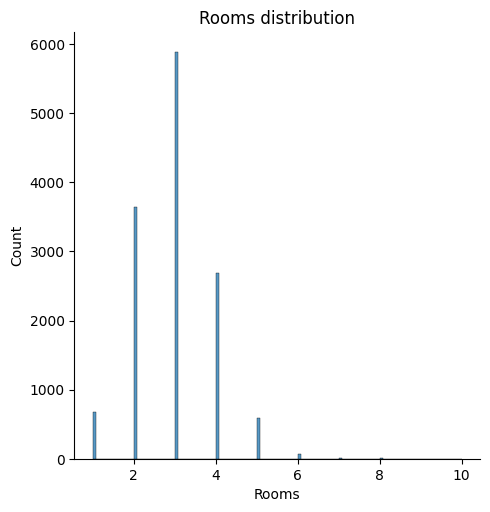

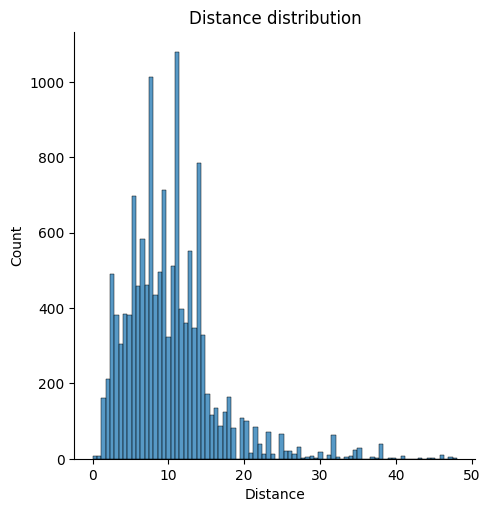

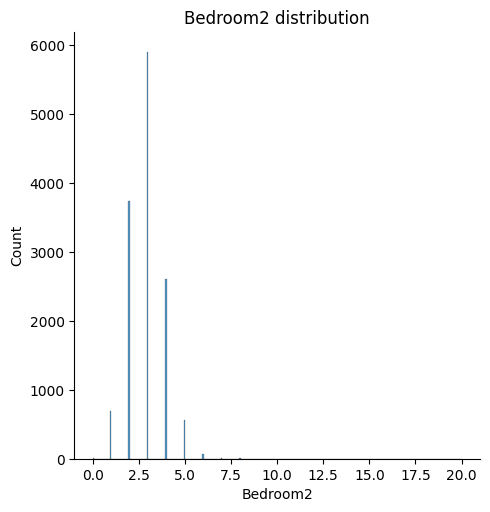

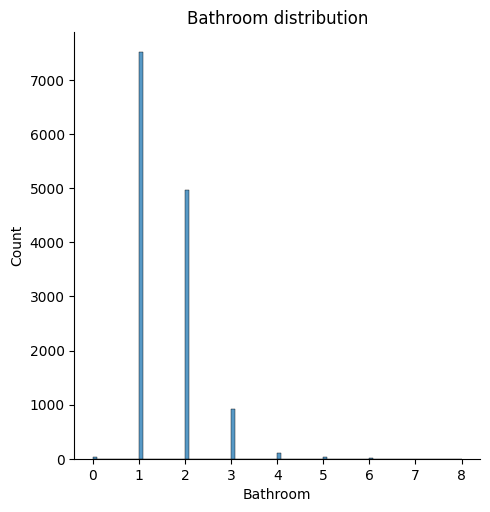

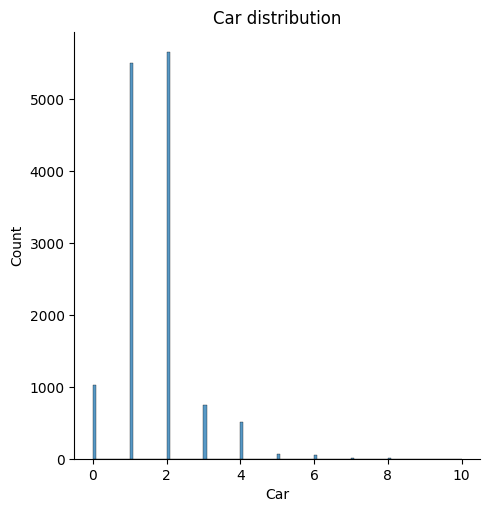

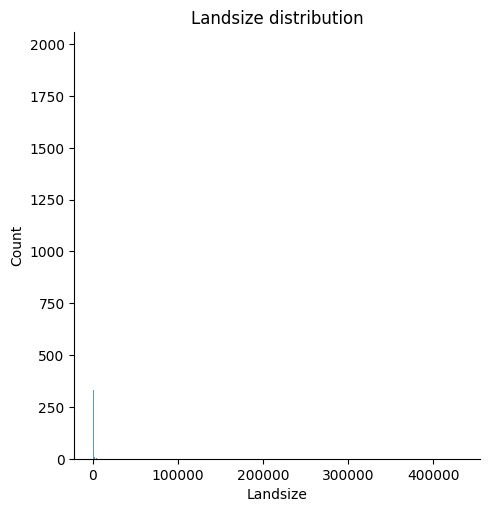

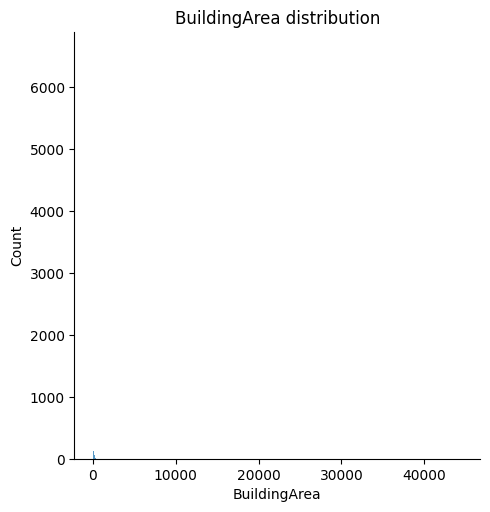

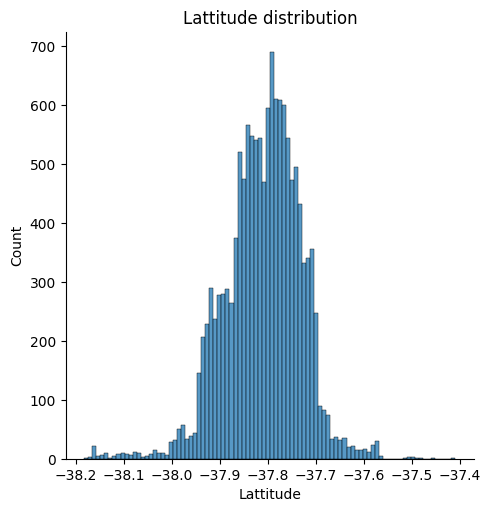

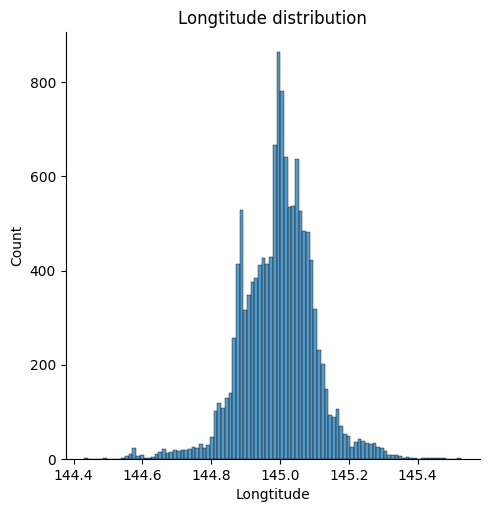

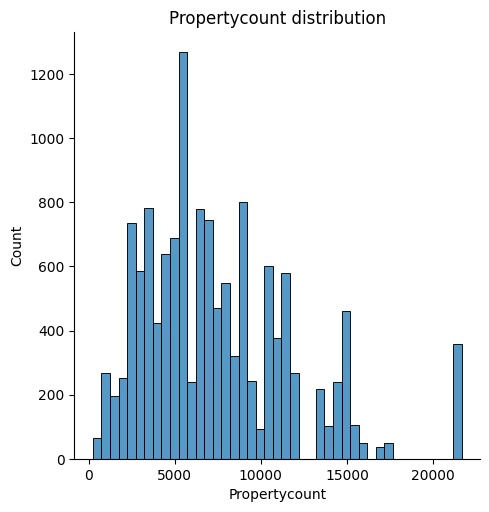

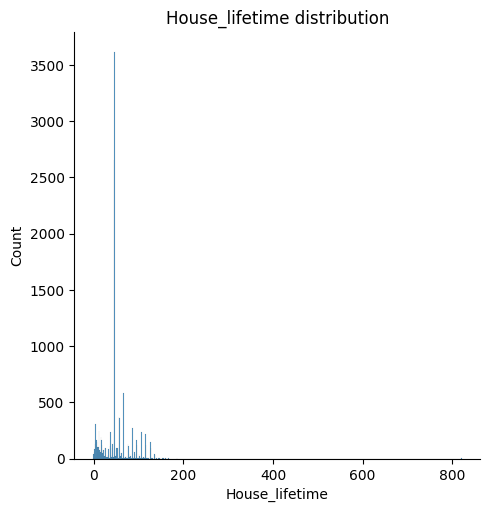

In [40]:
# Univariate distribution of numerical features to confirm the rejection
for column in X_num_preprocessed[:]:
  sns.displot(df_preprocessed, x=column)
  plt.title("{} distribution".format(column))


In [41]:
X_num_preprocessed

array(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'Propertycount',
       'House_lifetime'], dtype=object)

In [42]:
# As the features are non-linear, we are going to use spearman correlation
from scipy import stats

X=df_preprocessed.drop('Price', axis=1)
Xs=X[X_num_preprocessed.tolist()]
rho_corr = [stats.spearmanr(Xs.iloc[:, f], y).correlation for f in range(Xs.shape[1])]



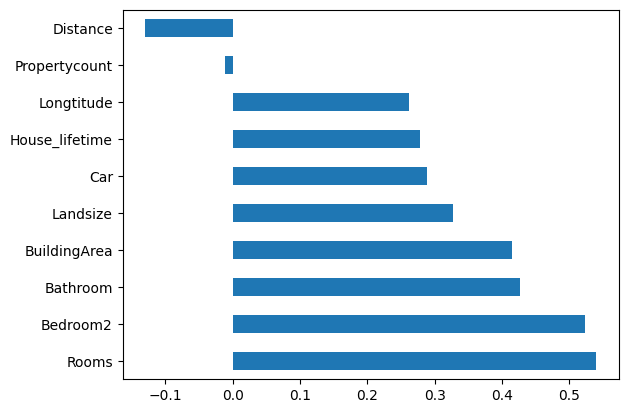

In [43]:
#Features importances with spearman
feat_importances_s = pd.Series(rho_corr, index=Xs.columns)
feat_importances_s.nlargest(10).plot(kind='barh')
plt.show()

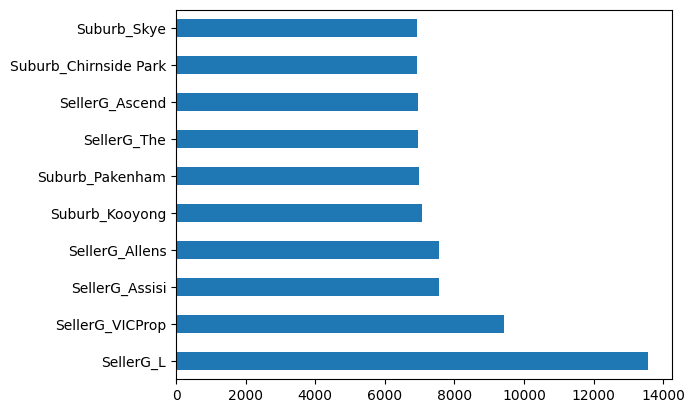

In [44]:
# Chi Square between categorical features and the target
Xc=X.drop(columns=X_num_preprocessed, axis=1)
bestfeatures_c = SelectKBest(score_func=chi2, k=10).fit(Xc,y)
feat_importances_c= pd.Series(bestfeatures_c.scores_,index=Xc.columns)
feat_importances_c.nlargest(10).plot(kind='barh')
plt.show()

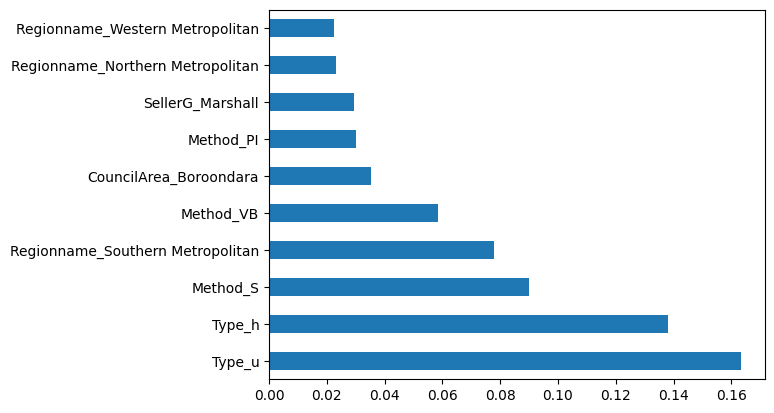

In [45]:
# Mutual information between categorical features and the target
bestfeatures_m = SelectKBest(score_func=mutual_info_regression, k=10).fit(Xc,y)
feat_importances_m= pd.Series(bestfeatures_m.scores_,index=Xc.columns)
feat_importances_m.nlargest(10).plot(kind='barh')
plt.show()

In [46]:
# Random Forest Features importances Method

<Axes: >

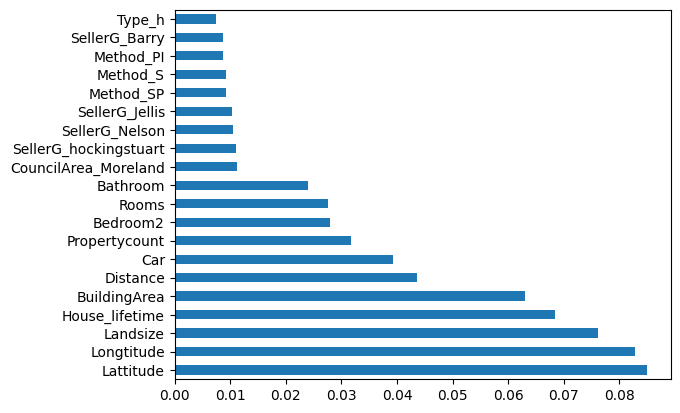

In [47]:
clf = RandomForestClassifier( n_estimators=10)

model = clf.fit(X,y)
feat_importances_f = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances_f.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_f.nlargest(20).plot(kind='barh')

The task consisted in selecting features that best explained the variability of the houses pries in Melbourne.  We first had to perform some data cleaning and transformations (missing values, encoding, normality checks, housing_lifetime as a difference between the year the housing got built and the year it was sold...etc.) to make the features selection posssible. Knowing the methods to apply, we later organize the features into two broad categories: numerical features and categorical features. The four methods performs differently as they were not implemented on the same subset of features.
* As the numerical features were non-linear, we chosen the spearman correlation method. It yielded a strong association between each of the number of bedrooms, bathrooms, building area, land size features, and the house price. The housing lifetime and the number of car spots was also found positively corelated with the prices but but a lesser degree.

* The chi2 filter method was applied between the cateorical features and the housing price. This was not the ideal implementation as the underliying logic of the method suggests that both the features and target to be categorical.However, it does shown that positive association between some real estate agents (VIC_PROP, Assisi..etc) and suburbs (Kooyong, Pakenham..etc) with the houses pricing.

* As with the chi2 method, The Mutual information implementation was implemented between the categorical variables and the housing price.It reavealed that the type t (house,cottage,villa, semi,terrace) and u (duplex, unit) were positivively associeted with higher house pricing with is congruent with the practical reality. It also shown that the southern metropolitan region was corelated with the house prices.

* The Random forest statistical technique was applied between all the features and the housing price. The feature importance attribte of the model was somewhat close what could have been hypothesized. The geography(longitude, latitude),land size, housing life_time,building area were proven to contribute to the housing pricing level.The method also revealed some of the features (number of bedrooms, bathrooms, cars, specific real estate agent..etc) picked by the previous methods.

In the nutshell, Random forest feature importance seems to have outperformed. This could be explained by the fact that the model has seen all the features and therefore captured the underlying pattern that best explained the price variability. However chi2 and mutual information methods performed the worst due the missing setup requirement. A more comprehenvive analysis that would transform the house price target into categorical variable would have provided better performance.